In [1]:
## Imported the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Reading the given datasets
cards_data=pd.read_csv("cards_data.csv")
transactions=pd.read_csv("transactions_data.csv")
users_data=pd.read_csv("users_data.csv")

In [3]:
cards_data

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,5361,185,Amex,Credit,300609782832003,01/2024,663,YES,1,$6900,11/2000,2013,No
6142,2711,185,Visa,Credit,4718517475996018,01/2021,492,YES,2,$5700,04/2012,2012,No
6143,1305,1007,Mastercard,Credit,5929512204765914,08/2020,237,NO,2,$9200,02/2012,2012,No
6144,743,1110,Mastercard,Debit,5589768928167462,01/2020,630,YES,1,$28074,01/2020,2020,No


In [4]:
cards_data.describe()

,id,client_id,card_number,cvv,num_cards_issued,year_pin_last_changed
count,6146.000000,6146.000000,6.146000e+03,6146.000000,6146.000000,6146.000000
mean,3072.500000,994.939636,4.820426e+15,506.220794,1.503091,2013.436707
std,1774.341709,578.614626,1.328582e+15,289.431123,0.519191,4.270699
min,0.000000,0.000000,3.001055e+14,0.000000,1.000000,2002.000000
25%,1536.250000,492.250000,4.486365e+15,257.000000,1.000000,2010.000000
50%,3072.500000,992.000000,5.108957e+15,516.500000,1.000000,2013.000000
75%,4608.750000,1495.000000,5.585237e+15,756.000000,2.000000,2017.000000
max,6145.000000,1999.000000,6.997197e+15,999.000000,3.000000,2020.000000


In [5]:
cards_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [6]:
transactions

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,NaN
13305911,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,NaN,NaN,5815,NaN
13305912,23761870,2019-10-31 23:57:00,199,1031,$40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,NaN
13305913,23761873,2019-10-31 23:58:00,1986,5443,$4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,NaN


In [7]:
transactions.describe()

,id,client_id,card_id,merchant_id,zip,mcc
count,1.330592e+07,1.330592e+07,1.330592e+07,1.330592e+07,1.165321e+07,1.330592e+07
mean,1.558402e+07,1.026812e+03,3.475268e+03,4.772376e+04,5.132782e+04,5.565440e+03
std,4.704499e+06,5.816386e+02,1.674356e+03,2.581534e+04,2.940423e+04,8.757002e+02
min,7.475327e+06,0.000000e+00,0.000000e+00,1.000000e+00,1.001000e+03,1.711000e+03
25%,1.150604e+07,5.190000e+02,2.413000e+03,2.588700e+04,2.860200e+04,5.300000e+03
50%,1.557087e+07,1.070000e+03,3.584000e+03,4.592600e+04,4.767000e+04,5.499000e+03
75%,1.965361e+07,1.531000e+03,4.901000e+03,6.757000e+04,7.790100e+04,5.812000e+03
max,2.376187e+07,1.998000e+03,6.144000e+03,1.003420e+05,9.992800e+04,9.402000e+03


In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ GB


In [9]:
users_data

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,986,32,70,1987,7,Male,6577 Lexington Lane,40.65,-73.58,$23550,$48010,$87837,703,3
1996,1944,62,65,1957,11,Female,2 Elm Drive,38.95,-84.54,$24218,$49378,$104480,740,4
1997,185,47,67,1973,1,Female,276 Fifth Boulevard,40.66,-74.19,$15175,$30942,$71066,779,3
1998,1007,66,60,1954,2,Male,259 Valley Boulevard,40.24,-76.92,$25336,$54654,$27241,618,1


In [10]:
users_data.describe()

,id,current_age,retirement_age,birth_year,birth_month,latitude,longitude,credit_score,num_credit_cards
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,45.391500,66.237500,1973.803000,6.439000,37.389225,-91.554765,709.734500,3.073000
std,577.494589,18.414092,3.628867,18.421234,3.565338,5.114324,16.283293,67.221949,1.637379
min,0.000000,18.000000,50.000000,1918.000000,1.000000,20.880000,-159.410000,480.000000,1.000000
25%,499.750000,30.000000,65.000000,1961.000000,3.000000,33.837500,-97.395000,681.000000,2.000000
50%,999.500000,44.000000,66.000000,1975.000000,7.000000,38.250000,-86.440000,711.500000,3.000000
75%,1499.250000,58.000000,68.000000,1989.000000,10.000000,41.200000,-80.130000,753.000000,4.000000
max,1999.000000,101.000000,79.000000,2002.000000,12.000000,61.200000,-68.670000,850.000000,9.000000


In [11]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


In [12]:
transactions.columns

Index(['id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors'],
      dtype='object')

In [13]:
users_data.columns

Index(['id', 'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'gender', 'address', 'latitude', 'longitude', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards'],
      dtype='object')

In [14]:
cards_data.columns

Index(['id', 'client_id', 'card_brand', 'card_type', 'card_number', 'expires',
       'cvv', 'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'card_on_dark_web'],
      dtype='object')

In [15]:
## Merging all the transaction with the cards info together
financial_data=transactions.merge(cards_data,left_on="card_id",right_on="id",how="left")

In [16]:
financial_data.columns

Index(['id_x', 'date', 'client_id_x', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'id_y', 'client_id_y', 'card_brand', 'card_type',
       'card_number', 'expires', 'cvv', 'has_chip', 'num_cards_issued',
       'credit_limit', 'acct_open_date', 'year_pin_last_changed',
       'card_on_dark_web'],
      dtype='object')

In [17]:
## Merging the new data with the users data together
financial_data = financial_data.merge(users_data,left_on="client_id_x",right_on="id",how="left")

In [18]:
financial_data

,id_x,date,client_id_x,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,...,7,Female,594 Mountain View Street,46.80,-100.76,$23679,$48277,$110153,740,4
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,...,6,Male,604 Pine Street,40.80,-91.12,$18076,$36853,$112139,834,5
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,...,4,Male,2379 Forest Lane,33.18,-117.29,$16894,$34449,$36540,686,3
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,...,5,Female,903 Hill Boulevard,41.42,-87.35,$26168,$53350,$128676,685,5
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,...,5,Male,166 River Drive,38.86,-76.60,$33529,$68362,$96182,711,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,...,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
13305911,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,NaN,NaN,...,9,Male,6076 Bayview Boulevard,43.06,-87.96,$9995,$20377,$12092,789,4
13305912,23761870,2019-10-31 23:57:00,199,1031,$40.44,Swipe Transaction,2925,Allen,TX,75002.0,...,4,Female,7927 Plum Lane,33.10,-96.66,$32580,$78329,$40161,720,3
13305913,23761873,2019-10-31 23:58:00,1986,5443,$4.00,Chip Transaction,46284,Daly City,CA,94014.0,...,12,Female,5887 Seventh Lane,37.68,-122.43,$23752,$48430,$62384,716,2


In [19]:
## Dataset if too Huge to handle by my PC so using only 1 million data
data = financial_data.sample(n=100_000, random_state=42)

In [20]:
data

,id_x,date,client_id_x,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
3714287,11978328,2012-11-23 16:03:00,619,3348,$263.43,Swipe Transaction,54850,Austin,MN,55912.0,...,12,Male,498 Littlewood Avenue,44.01,-92.47,$26478,$53986,$58381,748,4
3209236,11363233,2012-07-07 13:57:00,456,4576,$38.26,Swipe Transaction,68135,Cape Coral,FL,33909.0,...,10,Male,600 Grant Lane,26.63,-81.99,$17140,$34947,$49024,751,3
536544,8117710,2010-06-10 16:59:00,209,4676,$52.57,Swipe Transaction,81833,El Paso,TX,79928.0,...,1,Female,2111 Burns Street,31.65,-106.15,$14322,$29206,$25966,716,6
4229140,12606562,2013-04-13 12:08:00,1605,1133,$40.00,Swipe Transaction,27092,Amelia,OH,45102.0,...,5,Male,9995 Pine Avenue,39.50,-84.37,$19293,$39336,$43747,690,3
4246895,12628171,2013-04-18 10:00:00,144,5247,$4.58,Swipe Transaction,44578,Arkadelphia,AR,71923.0,...,3,Female,5380 12th Boulevard,34.50,-93.05,$15857,$32330,$97190,835,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414790,10394732,2011-11-29 11:16:00,1241,5230,$12.09,Swipe Transaction,40617,New Bremen,OH,45869.0,...,3,Female,159 Plum Avenue,40.43,-84.38,$24227,$49396,$39549,814,3
12039485,22194662,2018-12-04 06:58:00,490,5133,$17.19,Chip Transaction,30412,San Antonio,TX,78230.0,...,9,Male,90 Lexington Drive,29.45,-98.50,$29557,$33426,$1852,699,4
11956462,22092207,2018-11-12 10:37:00,597,3414,$65.65,Swipe Transaction,61195,Washington,DC,20008.0,...,1,Male,5138 North Drive,37.74,-122.44,$51692,$65055,$1676,736,6
11583008,21630881,2018-08-06 14:23:00,373,261,$-78.00,Chip Transaction,43293,Hamilton,IN,46742.0,...,2,Male,3270 Grant Avenue,40.59,-84.95,$10493,$21397,$54771,812,4


In [21]:
data.columns

Index(['id_x', 'date', 'client_id_x', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'id_y', 'client_id_y', 'card_brand', 'card_type',
       'card_number', 'expires', 'cvv', 'has_chip', 'num_cards_issued',
       'credit_limit', 'acct_open_date', 'year_pin_last_changed',
       'card_on_dark_web', 'id', 'current_age', 'retirement_age', 'birth_year',
       'birth_month', 'gender', 'address', 'latitude', 'longitude',
       'per_capita_income', 'yearly_income', 'total_debt', 'credit_score',
       'num_credit_cards'],
      dtype='object')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 3714287 to 1527337
Data columns (total 39 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id_x                   100000 non-null  int64  
 1   date                   100000 non-null  object 
 2   client_id_x            100000 non-null  int64  
 3   card_id                100000 non-null  int64  
 4   amount                 100000 non-null  object 
 5   use_chip               100000 non-null  object 
 6   merchant_id            100000 non-null  int64  
 7   merchant_city          100000 non-null  object 
 8   merchant_state         88259 non-null   object 
 9   zip                    87574 non-null   float64
 10  mcc                    100000 non-null  int64  
 11  errors                 1543 non-null    object 
 12  id_y                   100000 non-null  int64  
 13  client_id_y            100000 non-null  int64  
 14  card_brand             100000 non-

In [23]:
data.describe()

,id_x,client_id_x,card_id,merchant_id,zip,mcc,id_y,client_id_y,card_number,cvv,...,year_pin_last_changed,id,current_age,retirement_age,birth_year,birth_month,latitude,longitude,credit_score,num_credit_cards
count,1.000000e+05,100000.000000,100000.000000,100000.000000,87574.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.556699e+07,1025.974950,3474.061150,47774.695220,51293.306324,5562.028100,3474.061150,1025.974950,4.820570e+15,495.838190,...,2011.350360,1025.974950,54.084310,66.476250,1965.097550,6.571960,37.386921,-91.586429,713.598370,3.844070
std,4.704251e+06,582.571725,1674.352464,25859.878197,29376.949503,868.086319,1674.352464,582.571725,1.302299e+15,288.694715,...,2.901908,582.571725,15.762088,3.584236,15.753075,3.608065,5.087887,16.268646,65.599898,1.567412
min,7.475640e+06,0.000000,0.000000,5.000000,1040.000000,1711.000000,0.000000,0.000000,3.006098e+14,0.000000,...,2002.000000,0.000000,23.000000,53.000000,1918.000000,1.000000,21.300000,-158.180000,488.000000,1.000000
25%,1.147533e+07,515.000000,2416.000000,25887.000000,28586.000000,5300.000000,2416.000000,515.000000,4.481967e+15,246.000000,...,2010.000000,515.000000,42.000000,65.000000,1956.000000,3.000000,33.890000,-97.390000,684.000000,3.000000
50%,1.555480e+07,1073.000000,3583.000000,45968.000000,47542.000000,5499.000000,3583.000000,1073.000000,5.109331e+15,501.000000,...,2011.000000,1073.000000,52.000000,66.000000,1968.000000,7.000000,38.350000,-86.440000,716.000000,4.000000
75%,1.964161e+07,1530.000000,4893.000000,68147.000000,77857.000000,5812.000000,4893.000000,1530.000000,5.568043e+15,741.000000,...,2013.000000,1530.000000,63.000000,68.000000,1977.000000,10.000000,41.120000,-80.130000,755.000000,5.000000
max,2.376156e+07,1998.000000,6138.000000,100340.000000,99707.000000,9402.000000,6138.000000,1998.000000,6.994218e+15,999.000000,...,2020.000000,1998.000000,101.000000,79.000000,1996.000000,12.000000,48.530000,-68.670000,850.000000,9.000000


In [24]:
data.isnull().sum()

id_x                         0
date                         0
client_id_x                  0
card_id                      0
amount                       0
use_chip                     0
merchant_id                  0
merchant_city                0
merchant_state           11741
zip                      12426
mcc                          0
errors                   98457
id_y                         0
client_id_y                  0
card_brand                   0
card_type                    0
card_number                  0
expires                      0
cvv                          0
has_chip                     0
num_cards_issued             0
credit_limit                 0
acct_open_date               0
year_pin_last_changed        0
card_on_dark_web             0
id                           0
current_age                  0
retirement_age               0
birth_year                   0
birth_month                  0
gender                       0
address                      0
latitude

In [25]:
data.drop(columns=['errors'],inplace=True)
data.dropna(subset=['merchant_state'],inplace=True)
data.dropna(subset=['zip'],inplace=True)

In [26]:
data.isnull().sum()

id_x                     0
date                     0
client_id_x              0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state           0
zip                      0
mcc                      0
id_y                     0
client_id_y              0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
id                       0
current_age              0
retirement_age           0
birth_year               0
birth_month              0
gender                   0
address                  0
latitude                 0
longitude                0
per_capita_income        0
yearly_income            0
total_debt               0
credit_score             0
n

In [27]:
max_amount=data['amount'].max()
print("The maximum amount is:",max_amount)
min_amount=data['amount'].min()
print("The minimum amount is:",min_amount)
current_age=data['current_age'].max()
print("The maximum age is:",current_age)
min_age=data['current_age'].min()
print("The minimum age is:",min_age)
female=(data.gender=='Female').sum()
print("The number of female users are:",female)
male=(data.gender=='Male').sum()
print("The number of male users are:",male)
max_income=data['yearly_income'].max()
print("The maximum amount is:",max_income)
min_income=data['yearly_income'].min()
print("The minimum amount is:",min_income)

The maximum amount is: $996.80
The minimum amount is: $-0.24
The maximum age is: 101
The minimum age is: 23
The number of female users are: 44631
The number of male users are: 42943
The maximum amount is: $99825
The minimum amount is: $1


<Axes: xlabel='credit_limit', ylabel='Count'>

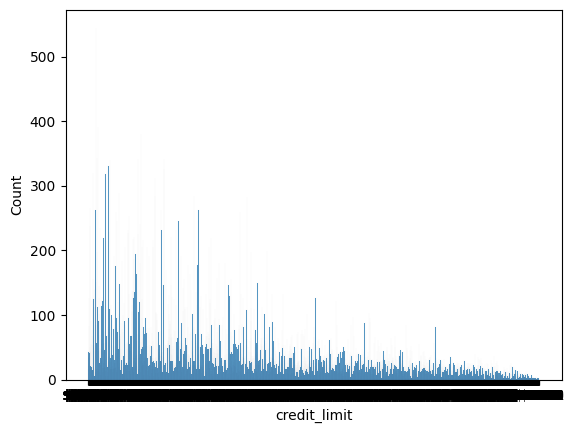

In [28]:
sns.histplot(data["credit_limit"], bins=50)

([], [])

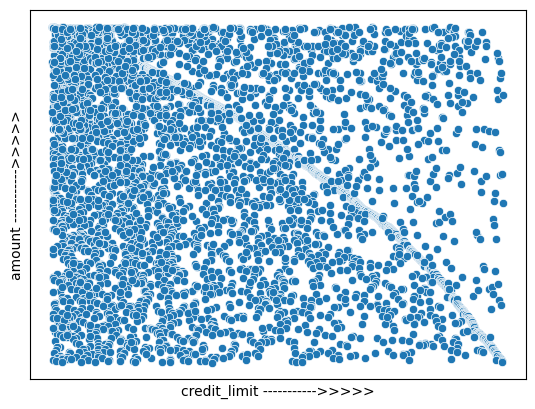

In [29]:
sns.scatterplot(x="credit_limit", y="amount", data=data.sample(5000))
plt.xlabel("credit_limit ----------->>>>>")
plt.ylabel("amount ----------->>>>>")
plt.xticks([])
plt.yticks([])

In [30]:
print(data['amount'].dtype)
print(data['credit_limit'].dtype)    

object
object


In [31]:
data['amount'] = data['amount'].str.replace('$', '').astype(float)
data['credit_limit'] = data['credit_limit'].str.replace('$', '').astype(float) 

In [32]:
print(data['amount'].dtype)
print(data['credit_limit'].dtype)

float64
float64


In [33]:
amount_ratio = data['amount'] / data['credit_limit']
print("amount_ratio is:",amount_ratio)
print("The higher the amount ratio more the risk because amount is close to credit limit")

amount_ratio is: 3714287     0.007906
3209236     0.003038
536544      0.020969
4229140     0.002179
4246895     0.000226
              ...   
2414790     0.000733
12039485    0.001328
11956462    0.002387
11583008   -0.011663
1527337     0.001193
Length: 87574, dtype: float64
The higher the amount ratio more the risk because amount is close to credit limit


<Axes: xlabel='use_chip', ylabel='count'>

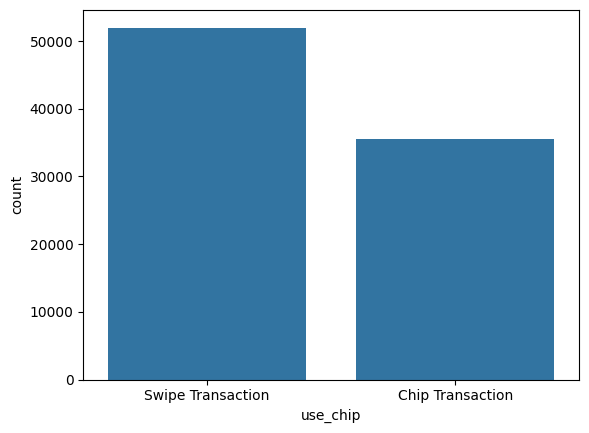

In [34]:
sns.countplot(x="use_chip", data=data)

<Axes: xlabel='credit_score', ylabel='Count'>

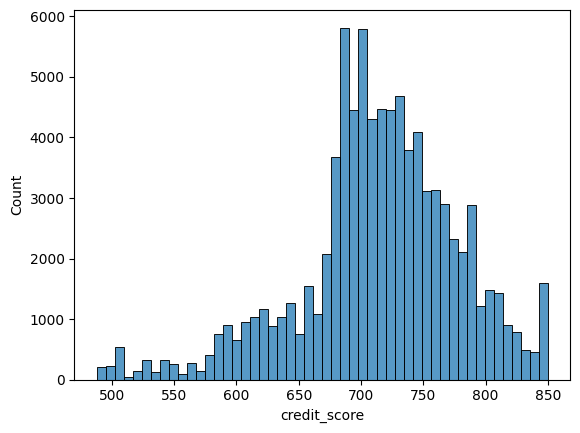

In [35]:
sns.histplot(data["credit_score"], bins=50)

([], [])

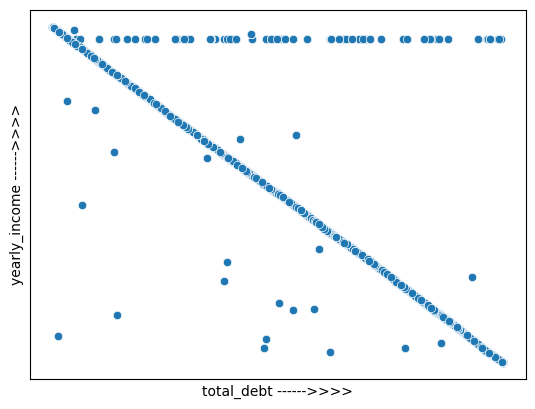

In [36]:
sns.scatterplot(x="yearly_income",y="total_debt",data=data)
plt.xlabel("total_debt ------>>>>")
plt.ylabel("yearly_income ------>>>>")
plt.xticks([])
plt.yticks([])

<Axes: xlabel='card_on_dark_web', ylabel='count'>

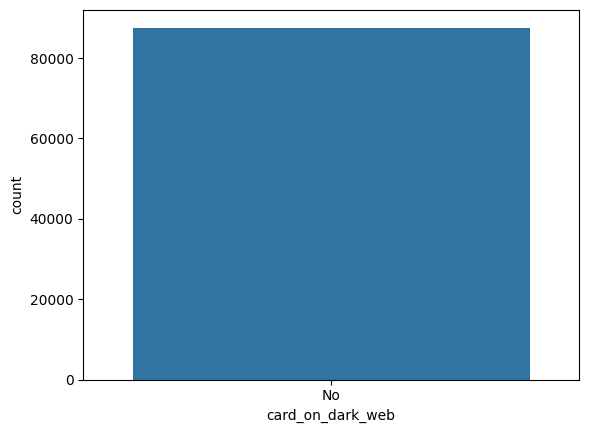

In [37]:
sns.countplot(x="card_on_dark_web", data=data)

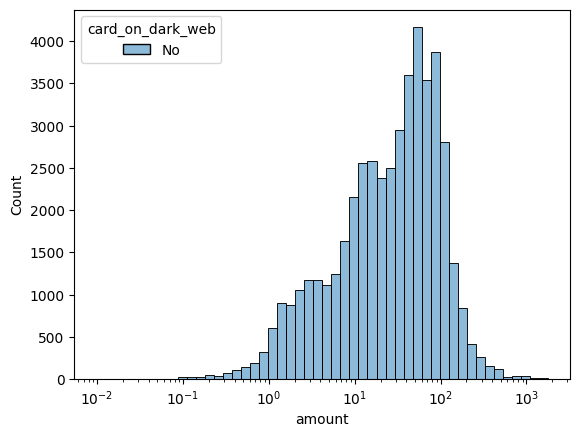

In [38]:
sns.histplot(data=data.sample(50000), x="amount",hue="card_on_dark_web",bins=50,log_scale=True)
plt.show()

In [39]:
object_columns= data.select_dtypes(include='object').columns
print(object_columns)

Index(['date', 'use_chip', 'merchant_city', 'merchant_state', 'card_brand',
       'card_type', 'expires', 'has_chip', 'acct_open_date',
       'card_on_dark_web', 'gender', 'address', 'per_capita_income',
       'yearly_income', 'total_debt'],
      dtype='object')


In [40]:
data['card_on_dark_web'] = data['card_on_dark_web'].map({'No':0, 'Yes':1})

In [41]:
data['date'] = pd.to_datetime(data['date']).astype(int) / 10**9
data['expires'] = pd.to_datetime(data['expires']).astype(int) / 10**9
data['acct_open_date'] = pd.to_datetime(data['acct_open_date']).astype(int) / 10**9
data['per_capita_income'] = data['per_capita_income'].str.replace('$', '').astype(float)
data['yearly_income'] = data['yearly_income'].str.replace('$', '').astype(float)
data['total_debt'] = data['total_debt'].str.replace('$', '').astype(float)

C:\Users\RONIT\AppData\Local\Temp\ipykernel_5472\640758797.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['expires'] = pd.to_datetime(data['expires']).astype(int) / 10**9
C:\Users\RONIT\AppData\Local\Temp\ipykernel_5472\640758797.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['acct_open_date'] = pd.to_datetime(data['acct_open_date']).astype(int) / 10**9


In [42]:
object_columns= data.select_dtypes(include='object').columns
print(object_columns)

Index(['use_chip', 'merchant_city', 'merchant_state', 'card_brand',
       'card_type', 'has_chip', 'gender', 'address'],
      dtype='object')


In [43]:
use_chip= pd.get_dummies(data['use_chip'], drop_first=True)
merchant_city= pd.get_dummies(data['merchant_city'], drop_first=True)
merchant_state= pd.get_dummies(data['merchant_state'], drop_first=True)
card_brand= pd.get_dummies(data['card_brand'], drop_first=True)
card_type= pd.get_dummies(data['card_type'], drop_first=True)
has_chip= pd.get_dummies(data['has_chip'], drop_first=True)
gender= pd.get_dummies(data['gender'], drop_first=True)
address= pd.get_dummies(data['address'], drop_first=True)

In [44]:
data.drop(['card_on_dark_web','use_chip', 'merchant_city', 'merchant_state', 'card_brand','card_type', 'has_chip','gender','address'],axis=1,inplace=True)

In [45]:
data= pd.concat([data,use_chip,card_brand,card_type,has_chip,gender,address],axis=1)
data

,id_x,date,client_id_x,card_id,amount,merchant_id,zip,mcc,id_y,client_id_y,...,992 Forest Street,9939 Mill Lane,995 Martin Luther King Street,9952 South Lane,996 Valley Drive,9977 Oak Avenue,99791 12th Boulevard,9982 Summit Boulevard,9983 Park Drive,9995 Pine Avenue
3714287,11978328,1.353687e+09,619,3348,263.43,54850,55912.0,4814,3348,619,...,False,False,False,False,False,False,False,False,False,False
3209236,11363233,1.341669e+09,456,4576,38.26,68135,33909.0,5411,4576,456,...,False,False,False,False,False,False,False,False,False,False
536544,8117710,1.276189e+09,209,4676,52.57,81833,79928.0,5912,4676,209,...,False,False,False,False,False,False,False,False,False,False
4229140,12606562,1.365855e+09,1605,1133,40.00,27092,45102.0,4829,1133,1605,...,False,False,False,False,False,False,False,False,False,True
4246895,12628171,1.366279e+09,144,5247,4.58,44578,71923.0,5812,5247,144,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414790,10394732,1.322565e+09,1241,5230,12.09,40617,45869.0,7542,5230,1241,...,False,False,False,False,False,False,False,False,False,False
12039485,22194662,1.543907e+09,490,5133,17.19,30412,78230.0,5411,5133,490,...,False,False,False,False,False,False,False,False,False,False
11956462,22092207,1.542019e+09,597,3414,65.65,61195,20008.0,5541,3414,597,...,False,False,False,False,False,False,False,False,False,False
11583008,21630881,1.533565e+09,373,261,-78.00,43293,46742.0,5499,261,373,...,False,False,False,False,False,False,False,False,False,False


In [46]:
object_columns= data.select_dtypes(include='object').columns
print(object_columns)

Index([], dtype='object')


In [47]:
data['amount']

3714287     263.43
3209236      38.26
536544       52.57
4229140      40.00
4246895       4.58
             ...  
2414790      12.09
12039485     17.19
11956462     65.65
11583008    -78.00
1527337      19.06
Name: amount, Length: 87574, dtype: float64

In [48]:
x_risk=data.drop('amount',axis=1)
y_risk=data['amount']

In [49]:
x_risk

,id_x,date,client_id_x,card_id,merchant_id,zip,mcc,id_y,client_id_y,card_number,...,992 Forest Street,9939 Mill Lane,995 Martin Luther King Street,9952 South Lane,996 Valley Drive,9977 Oak Avenue,99791 12th Boulevard,9982 Summit Boulevard,9983 Park Drive,9995 Pine Avenue
3714287,11978328,1.353687e+09,619,3348,54850,55912.0,4814,3348,619,5531418228277739,...,False,False,False,False,False,False,False,False,False,False
3209236,11363233,1.341669e+09,456,4576,68135,33909.0,5411,4576,456,5915761072331247,...,False,False,False,False,False,False,False,False,False,False
536544,8117710,1.276189e+09,209,4676,81833,79928.0,5912,4676,209,5607093669748051,...,False,False,False,False,False,False,False,False,False,False
4229140,12606562,1.365855e+09,1605,1133,27092,45102.0,4829,1133,1605,4607163659779577,...,False,False,False,False,False,False,False,False,False,True
4246895,12628171,1.366279e+09,144,5247,44578,71923.0,5812,5247,144,5891798640440029,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414790,10394732,1.322565e+09,1241,5230,40617,45869.0,7542,5230,1241,6694401699327793,...,False,False,False,False,False,False,False,False,False,False
12039485,22194662,1.543907e+09,490,5133,30412,78230.0,5411,5133,490,4048588745318463,...,False,False,False,False,False,False,False,False,False,False
11956462,22092207,1.542019e+09,597,3414,61195,20008.0,5541,3414,597,309433518890778,...,False,False,False,False,False,False,False,False,False,False
11583008,21630881,1.533565e+09,373,261,43293,46742.0,5499,261,373,4139199465174934,...,False,False,False,False,False,False,False,False,False,False


In [50]:
y_risk

3714287     263.43
3209236      38.26
536544       52.57
4229140      40.00
4246895       4.58
             ...  
2414790      12.09
12039485     17.19
11956462     65.65
11583008    -78.00
1527337      19.06
Name: amount, Length: 87574, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
x_risk_train,x_risk_test,y_risk_train,y_risk_test=train_test_split(x_risk,y_risk,test_size=0.3)

In [52]:
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [53]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_risk_train,y_risk_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
risk_prediction=lr.predict(x_risk_test)
risk_prediction

array([44.25851802, 50.87780635, 34.30500825, ..., 48.85584045,
       47.04850699, 42.70222108], shape=(26273,))

In [55]:
risk_ratio= y_risk_test/risk_prediction
risk_ratio

4661153     3.163233
12957970    0.019851
4426430     1.347908
12298022    1.406809
12962398    1.181135
              ...   
1806707     1.638352
10449930    1.714071
6268146     2.766302
3532327     1.351371
12273355    0.081495
Name: amount, Length: 26273, dtype: float64

In [56]:
accuracy=mean_absolute_error(y_risk_test,risk_prediction)
print("The accuracy of this model is:",accuracy)

The accuracy of this model is: 44.555091867476385


In [57]:
error=np.sqrt(metrics.mean_squared_error(y_risk_test,risk_prediction))
print("The mean error is",error)

The mean error is 82.35178951987044


In [58]:
all_predictions = lr.predict(x_risk)

In [59]:
data['risk_ratio'] = y_risk / all_predictions

In [60]:
data['is_fraud'] = (data['risk_ratio'] > 1).astype(int)

In [61]:
data

,id_x,date,client_id_x,card_id,amount,merchant_id,zip,mcc,id_y,client_id_y,...,995 Martin Luther King Street,9952 South Lane,996 Valley Drive,9977 Oak Avenue,99791 12th Boulevard,9982 Summit Boulevard,9983 Park Drive,9995 Pine Avenue,risk_ratio,is_fraud
3714287,11978328,1.353687e+09,619,3348,263.43,54850,55912.0,4814,3348,619,...,False,False,False,False,False,False,False,False,6.149532,1
3209236,11363233,1.341669e+09,456,4576,38.26,68135,33909.0,5411,4576,456,...,False,False,False,False,False,False,False,False,1.139299,1
536544,8117710,1.276189e+09,209,4676,52.57,81833,79928.0,5912,4676,209,...,False,False,False,False,False,False,False,False,1.824117,1
4229140,12606562,1.365855e+09,1605,1133,40.00,27092,45102.0,4829,1133,1605,...,False,False,False,False,False,False,False,True,0.956850,0
4246895,12628171,1.366279e+09,144,5247,4.58,44578,71923.0,5812,5247,144,...,False,False,False,False,False,False,False,False,0.137047,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414790,10394732,1.322565e+09,1241,5230,12.09,40617,45869.0,7542,5230,1241,...,False,False,False,False,False,False,False,False,0.329255,0
12039485,22194662,1.543907e+09,490,5133,17.19,30412,78230.0,5411,5133,490,...,False,False,False,False,False,False,False,False,0.427402,0
11956462,22092207,1.542019e+09,597,3414,65.65,61195,20008.0,5541,3414,597,...,False,False,False,False,False,False,False,False,1.068789,1
11583008,21630881,1.533565e+09,373,261,-78.00,43293,46742.0,5499,261,373,...,False,False,False,False,False,False,False,False,-2.338579,0


In [62]:
data['is_fraud']

3714287     1
3209236     1
536544      1
4229140     0
4246895     0
           ..
2414790     0
12039485    0
11956462    1
11583008    0
1527337     0
Name: is_fraud, Length: 87574, dtype: int64

In [63]:
x_fraud=data.drop('is_fraud',axis=1)
y_fraud=data['is_fraud']

In [64]:
x_fraud

,id_x,date,client_id_x,card_id,amount,merchant_id,zip,mcc,id_y,client_id_y,...,9939 Mill Lane,995 Martin Luther King Street,9952 South Lane,996 Valley Drive,9977 Oak Avenue,99791 12th Boulevard,9982 Summit Boulevard,9983 Park Drive,9995 Pine Avenue,risk_ratio
3714287,11978328,1.353687e+09,619,3348,263.43,54850,55912.0,4814,3348,619,...,False,False,False,False,False,False,False,False,False,6.149532
3209236,11363233,1.341669e+09,456,4576,38.26,68135,33909.0,5411,4576,456,...,False,False,False,False,False,False,False,False,False,1.139299
536544,8117710,1.276189e+09,209,4676,52.57,81833,79928.0,5912,4676,209,...,False,False,False,False,False,False,False,False,False,1.824117
4229140,12606562,1.365855e+09,1605,1133,40.00,27092,45102.0,4829,1133,1605,...,False,False,False,False,False,False,False,False,True,0.956850
4246895,12628171,1.366279e+09,144,5247,4.58,44578,71923.0,5812,5247,144,...,False,False,False,False,False,False,False,False,False,0.137047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414790,10394732,1.322565e+09,1241,5230,12.09,40617,45869.0,7542,5230,1241,...,False,False,False,False,False,False,False,False,False,0.329255
12039485,22194662,1.543907e+09,490,5133,17.19,30412,78230.0,5411,5133,490,...,False,False,False,False,False,False,False,False,False,0.427402
11956462,22092207,1.542019e+09,597,3414,65.65,61195,20008.0,5541,3414,597,...,False,False,False,False,False,False,False,False,False,1.068789
11583008,21630881,1.533565e+09,373,261,-78.00,43293,46742.0,5499,261,373,...,False,False,False,False,False,False,False,False,False,-2.338579


In [65]:
y_fraud

3714287     1
3209236     1
536544      1
4229140     0
4246895     0
           ..
2414790     0
12039485    0
11956462    1
11583008    0
1527337     0
Name: is_fraud, Length: 87574, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test=train_test_split(x_fraud,y_fraud,test_size=0.3)

In [67]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [68]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_fraud_train,y_fraud_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [69]:
lr_fraud_prediction=lr.predict(x_fraud_test)
lr_fraud_prediction

array([0, 0, 0, ..., 0, 0, 0], shape=(26273,))

In [70]:
print(classification_report(y_fraud_test,lr_fraud_prediction))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74     15564
           1       0.00      0.00      0.00     10709

    accuracy                           0.59     26273
   macro avg       0.30      0.50      0.37     26273
weighted avg       0.35      0.59      0.44     26273



C:\Users\RONIT\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\RONIT\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\RONIT\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

In [71]:
accurate=accuracy_score(y_fraud_test,lr_fraud_prediction)*100
print("The accuracy score is:",accurate,"% accurate.")

The accuracy score is: 59.23952346515434 % accurate.


In [72]:
lr_cm=confusion_matrix(y_fraud_test,lr_fraud_prediction)
lr_cm

array([[15564,     0],
       [10709,     0]])

<Axes: >

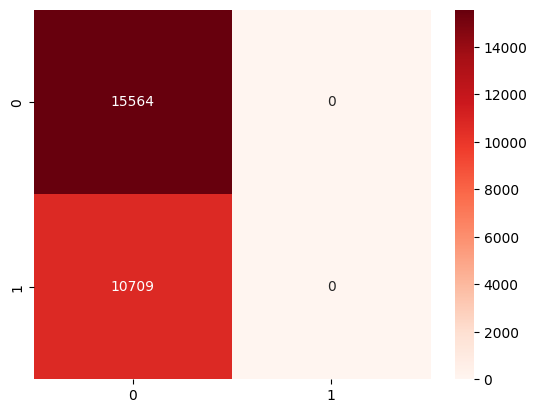

In [73]:
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Reds")

In [74]:
from sklearn.naive_bayes import GaussianNB
gb= GaussianNB()
gb.fit(x_fraud_train,y_fraud_train)

,priors,None
,var_smoothing,1e-09


In [75]:
gb_prediction=gb.predict(x_fraud_test)
gb_prediction

array([0, 0, 0, ..., 0, 0, 0], shape=(26273,))

In [76]:
print(classification_report(y_fraud_test,gb_prediction))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74     15564
           1       0.00      0.00      0.00     10709

    accuracy                           0.59     26273
   macro avg       0.30      0.50      0.37     26273
weighted avg       0.35      0.59      0.44     26273



C:\Users\RONIT\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\RONIT\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\RONIT\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

In [77]:
accurate=accuracy_score(y_fraud_test,gb_prediction)*100
print("The accuracy of this model is:",accurate,"% accurate.")

The accuracy of this model is: 59.23952346515434 % accurate.


In [78]:
gb_cm=confusion_matrix(y_fraud_test,gb_prediction)
gb_cm

array([[15564,     0],
       [10709,     0]])

<Axes: >

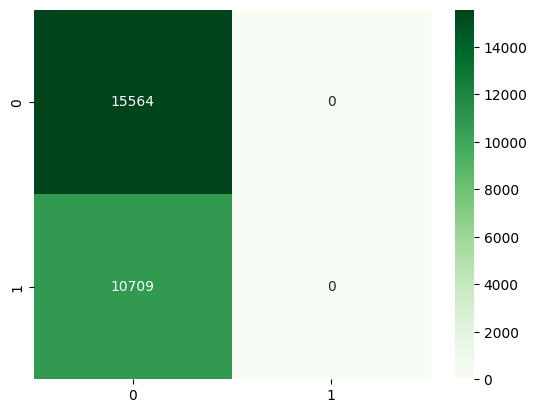

In [79]:
sns.heatmap(gb_cm, annot=True, fmt="d", cmap="Greens")

In [80]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(random_state=42)
dc.fit(x_fraud_train,y_fraud_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [81]:
dc_prediction=dc.predict(x_fraud_test)
dc_prediction

array([1, 0, 1, ..., 0, 1, 1], shape=(26273,))

In [82]:
dc_cm=confusion_matrix(y_fraud_test,dc_prediction)
dc_cm

array([[15564,     0],
       [    1, 10708]])

<Axes: >

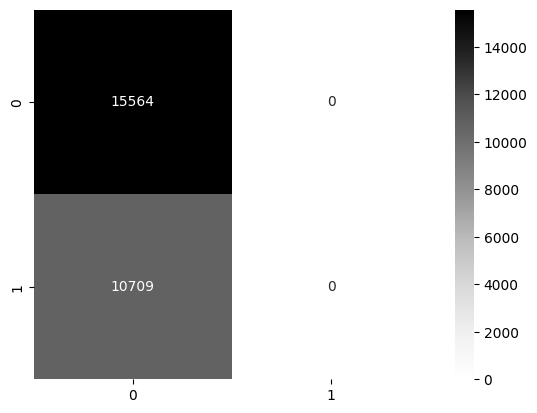

In [83]:
sns.heatmap(gb_cm, annot=True, fmt="d", cmap="Greys")

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_fraud)

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [86]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

In [87]:
cm=(confusion_matrix(y_fraud, clusters))
cm

array([[24408, 27621],
       [17262, 18283]])

<Axes: >

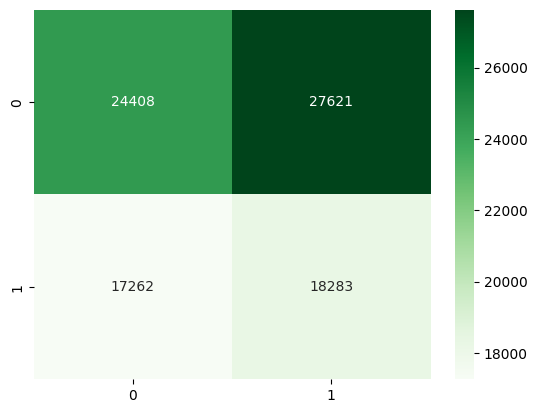

In [88]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")

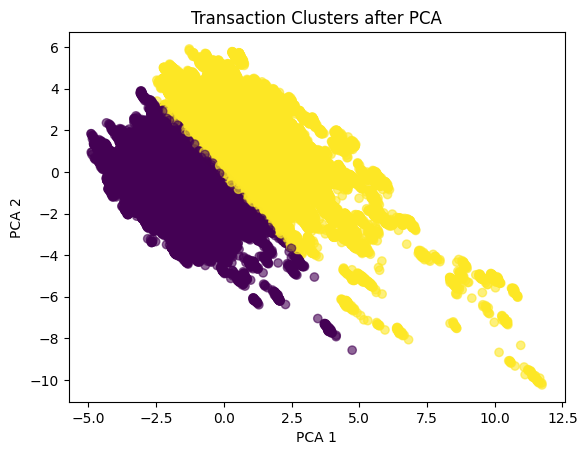

In [89]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Transaction Clusters after PCA")
plt.show()